<a href="https://colab.research.google.com/gist/GOikonomidis/732e2796b7dcf194166d04db3db74272/machine-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classificiation 

#### Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

#### Algorithms

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### The following data are used to predict heart diseases:

age,

sex,

chest pain type(cp),

resting blood pressure(trestbps),

serum cholesterol(chol),

fasting blood pressure(fbs),

resting electrocardiographic results(restecg),

maximum heart rate achieved( thalach),

exercise induced angina(exang),

ST depression induced by exercise relative to rest(oldpeak),

the slope of the peakexercise ST segment(slope), 

number of major vessels colored by flourosopy

number of major vessels colored by thalassemia

#### Taking a closer look at our database

In [ ]:
hd = pd.read_csv('heart.csv')

In [ ]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Creating a heatmap for our data

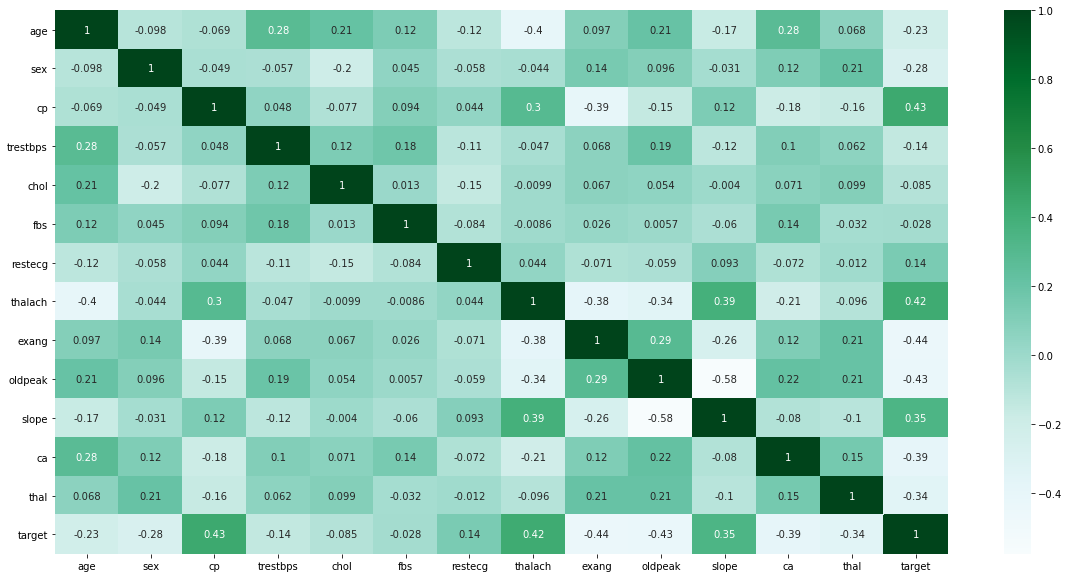

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(hd.corr(), annot=True, cmap='BuGn')

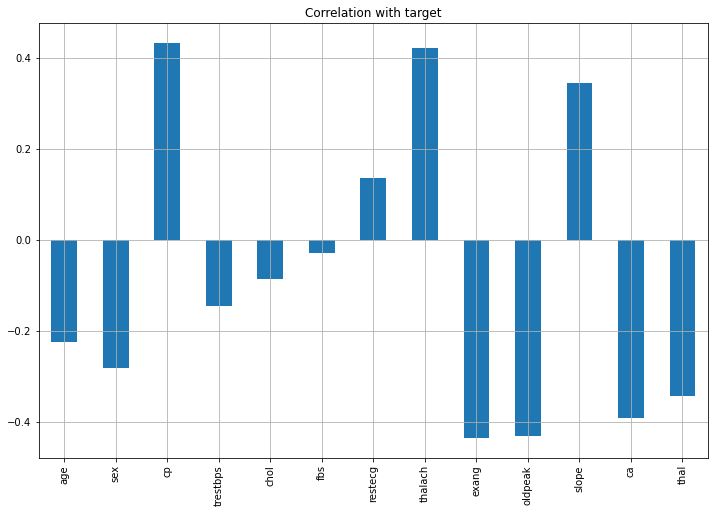

In [ ]:
hd.drop('target', axis=1).corrwith(hd.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

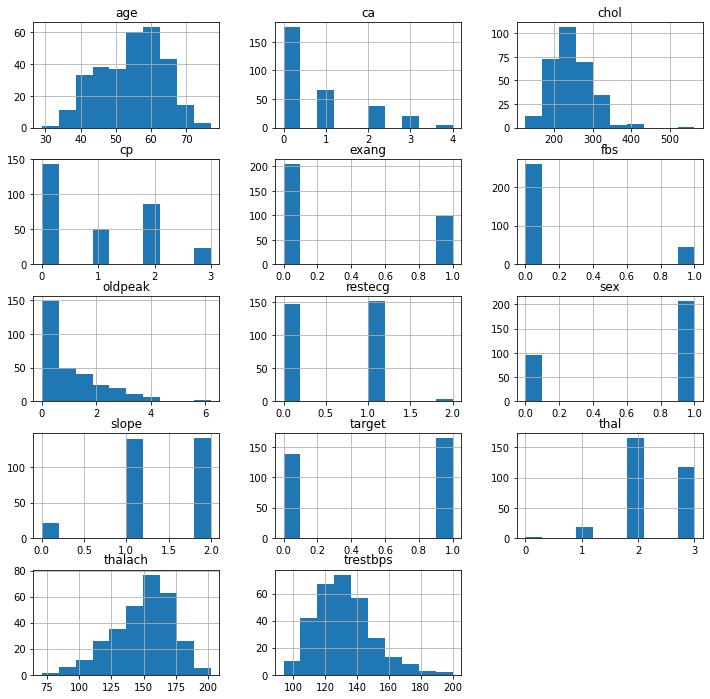

In [ ]:
hd.hist(figsize=(12,12), layout=(5,3));

#### Creating training & testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X = hd[['age','sex','cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach','exang','oldpeak','slope','ca','thal']]
y= hd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

#### Classification using K Neighbors

Minimum error =  0.19230769230769232 για k= 38


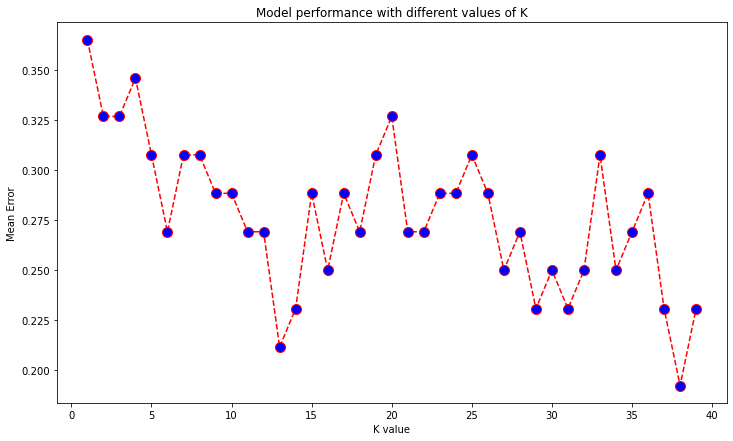

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

        
plt.figure(figsize=(12, 7))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Model performance with different values of Κ')
plt.xlabel('Κ value')
plt.ylabel('Mean Error')
print("Minimum error = ",min(error),"για k=",np.argmin(error)+1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnClass = KNeighborsClassifier(n_neighbors=38)
knnClass.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=38)

In [ ]:
y_pred = knnClass.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
accuracy_score(y_test, y_pred)


Accuracy Score:


0.8076923076923077

In [ ]:
from sklearn.metrics import f1_score
print("f1 Score:")
f1_score(y_test, y_pred, average='weighted')

f1 Score:


0.8082621082621082

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  3],
       [ 7, 22]], dtype=int64)

#### Classification using Decision Trees

In [ ]:
from sklearn import tree

In [ ]:
dtree = tree.DecisionTreeClassifier("gini",max_depth=12)

D:\Anaconta\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass criterion=gini as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
accuracy_score(y_test, y_pred)

Accuracy Score:


0.8269230769230769

In [ ]:
from sklearn.metrics import f1_score
print("f1 Score:")
f1_score(y_test, y_pred, average='weighted')

f1 Score:


0.8264748569964996

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22,  1],
       [ 8, 21]], dtype=int64)

#### Classification using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=500, random_state=0)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=0)

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:")
accuracy_score(y_test, y_pred)

Accuracy Score:


0.8461538461538461

In [ ]:
from sklearn.metrics import f1_score
print("f1 Score:")
f1_score(y_test, y_pred, average='weighted')

f1 Score:


0.8452214452214453

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18,  5],
       [ 3, 26]], dtype=int64)

By using Random Forest there are less False Positive results.

By using Decision Tree there are less True Negative results.

On most cases when dealing with medical issues, the algorithms that are being chosen are those with less True Negative Results.

So the optimal algorithm for our dataset is Decision Tree.

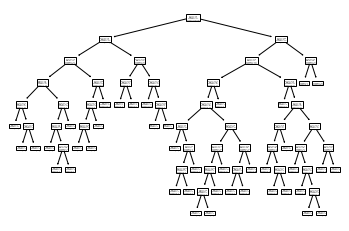

In [ ]:
tree.plot_tree(dtree);

### Regression

#### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn import neighbors

#### A closer look on the dataset

In [ ]:
profit = pd.read_csv('online.csv')

In [ ]:
profit.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [ ]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
profit.isnull().any()

Marketing Spend    False
Administration     False
Transport          False
Area               False
Profit             False
dtype: bool

#### EDA (Exploratory Data Analysis)

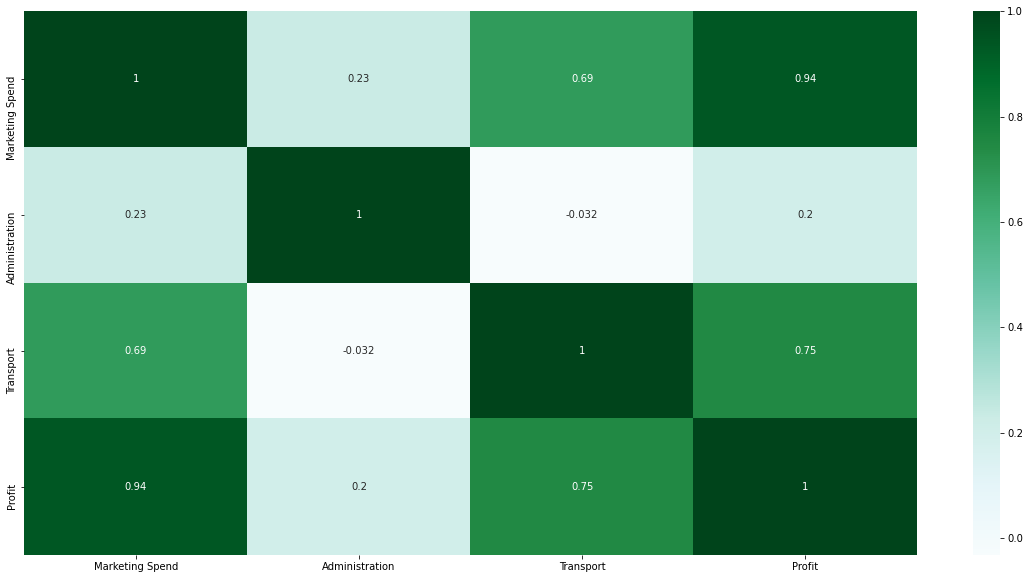

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(profit.corr(), annot=True, cmap='BuGn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE0D3A23A0>,
      dtype=object)

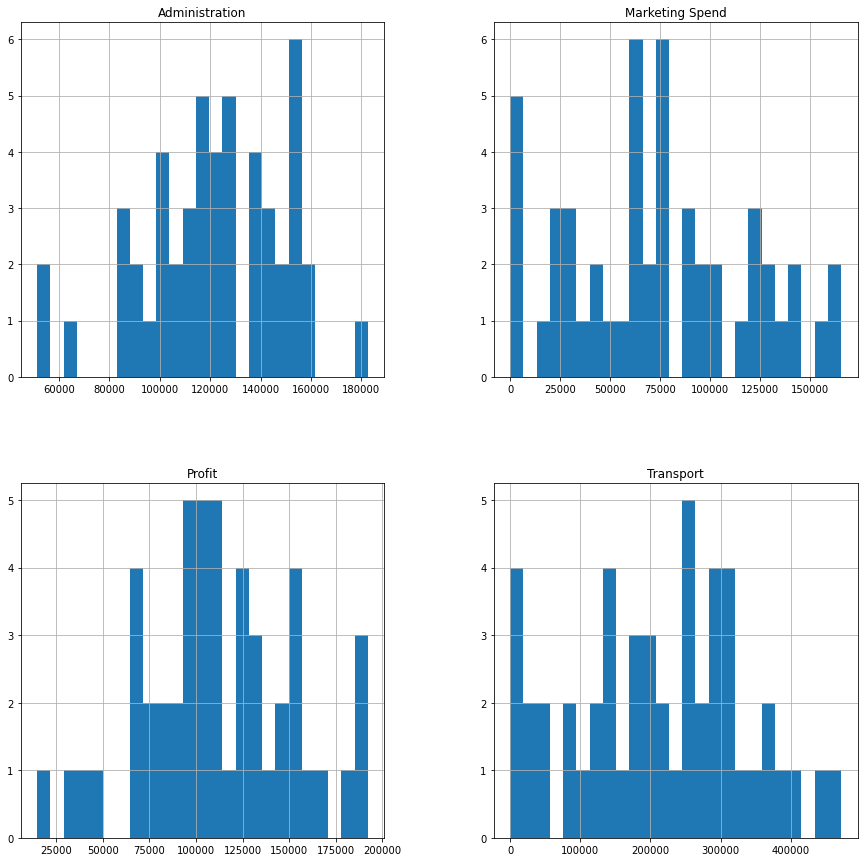

In [ ]:
profit.hist(bins=25, figsize=(15, 15))

#### Creating training & testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X = profit[[ 'Administration','Marketing Spend','Transport']]
y= profit['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 3)
(15, 3)
(35,)
(15,)


#### Linear Regression 

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred_test = model.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
model.score(X_test, y_test)

print("The results of the Regressor for test data are")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',model.score(X_test, y_test))

The results of the Regressor for test data are
--------------------------------------
Mean Absolute Error=  7553.089497692909
R2 score =  0.9022501280424616


#### KNeighbors Regression

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred_test = model.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
model.score(X_test, y_test)

print("The results of the Regressor for test data are")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',model.score(X_test, y_test))

The results of the Regressor for test data are
--------------------------------------
Mean Absolute Error=  5772.288444444452
R2 score =  0.9417676687433891


#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

y_pred_test = rfr.predict(X_test)

mae=metrics.mean_absolute_error(y_test, y_pred_test)
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
rfr.score(X_test, y_test)

print("The results of the Regressor for test data are")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',rfr.score(X_test, y_test))

The results of the Regressor for test data are
--------------------------------------
Mean Absolute Error=  8939.016466666671
R2 score =  0.8821843009453695


#### Area data is type "object" so we need to change it for more accurate machine learning

In [ ]:
print(profit['Area'].unique())

['Dhaka' 'Ctg' 'Rangpur']


#### Changine type to float

In [ ]:
profit.Area[profit.Area == 'Dhaka'] = 1
profit.Area[profit.Area == 'Ctg'] = 2
profit.Area[profit.Area == 'Rangpur'] = 3

<ipython-input-45-933433b4a36a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit.Area[profit.Area == 'Dhaka'] = 1
<ipython-input-45-933433b4a36a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit.Area[profit.Area == 'Ctg'] = 2
<ipython-input-45-933433b4a36a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit.Area[profit.Area == 'Rangpur'] = 3


In [ ]:
profit.Area=profit.Area.astype('float')

In [ ]:
print(profit['Area'].unique())

[1. 2. 3.]


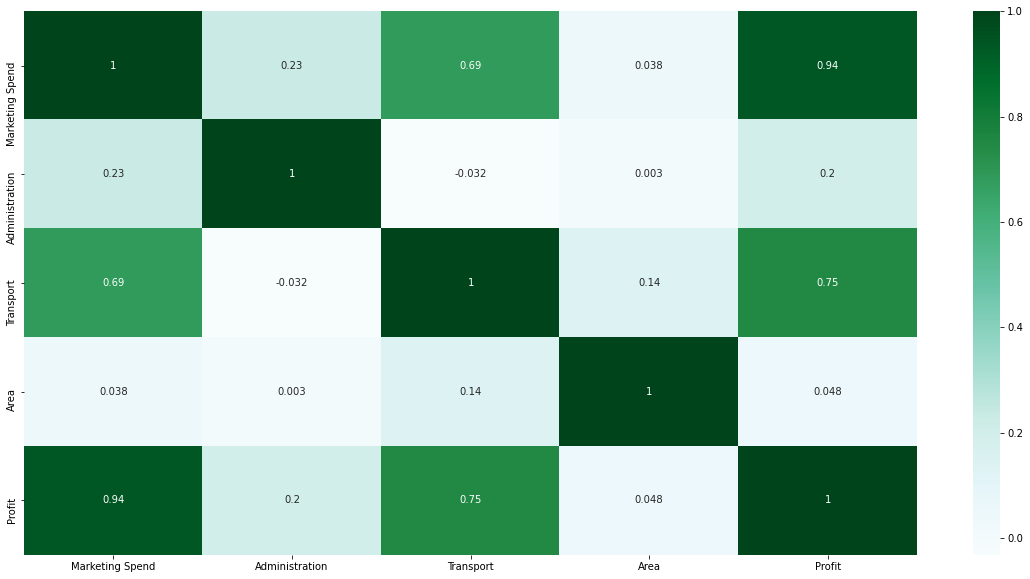

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(profit.corr(), annot=True, cmap='BuGn')

Making a new Regressor for all the data

In [ ]:
from sklearn.model_selection import train_test_split

X = profit[[ 'Administration','Marketing Spend', 'Area' ,'Transport']]
y= profit['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 4)
(15, 4)
(35,)
(15,)


Linear Regressor

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred_test = model.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
model.score(X_test, y_test)

print("The results of the Regressor for test data are")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',model.score(X_test, y_test))

The results of the Regressor for test data are
--------------------------------------
Mean Absolute Error=  7699.109923367031
R2 score =  0.889695953100893


#### Previous Results
Mean Absolute Error=  7553.089497692909
R2 score =  0.9022501280424616

#### Kneighbors Regression

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred_test = model.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
model.score(X_test, y_test)

print("The results of the Regressor for test data are:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',model.score(X_test, y_test))

The results of the Regressor for test data are:
--------------------------------------
Mean Absolute Error=  5772.288444444452
R2 score =  0.9417676687433891


## Previous Results
Mean Absolute Error=  9412.616933333342
R2 score =  5772.288444444452

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

y_pred_test = rfr.predict(X_test)

mae=metrics.mean_absolute_error(y_test, y_pred_test)
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
rfr.score(X_test, y_test)

print("The results of the Regressor for test data are")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',rfr.score(X_test, y_test))

The results of the Regressor for test data are
--------------------------------------
Mean Absolute Error=  7697.37126666667
R2 score =  0.9010727883040387


#### Previous Results
Mean Absolute Error=  8939.016466666671
R2 score =  0.8821843009453695